final project
===
due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 2: IQ and creativity

https://pubmed.ncbi.nlm.nih.gov/23825884/  
https://osf.io/hzpgy/

### Description

The relationship between intelligence and creativity: New support for the threshold hypothesis by means of empirical breakpoint detection 

#### Abstract

The relationship between intelligence and creativity has been subject to empirical research for decades. Nevertheless, there is yet no consensus on how these constructs are related. One of the most prominent notions concerning the interplay between intelligence and creativity is the threshold hypothesis, which assumes that above-average intelligence represents a necessary condition for high-level creativity. While earlier research mostly supported the threshold hypothesis, it has come under fire in recent investigations. The threshold hypothesis is commonly investigated by splitting a sample at a given threshold (e.g., at 120 IQ points) and estimating separate correlations for lower and upper IQ ranges. However, there is no compelling reason why the threshold should be fixed at an IQ of 120, and to date, no attempts have been made to detect the threshold empirically. Therefore, this study examined the relationship between intelligence and different indicators of creative potential and of creative achievement by means of segmented regression analysis in a sample of 297 participants. Segmented regression allows for the detection of a threshold in continuous data by means of iterative computational algorithms. We found thresholds only for measures of creative potential but not for creative achievement. For the former the thresholds varied as a function of criteria: When investigating a liberal criterion of ideational originality (i.e., two original ideas), a threshold was detected at around 100 IQ points. In contrast, a threshold of 120 IQ points emerged when the criterion was more demanding (i.e., many original ideas). Moreover, an IQ of around 85 IQ points was found to form the threshold for a purely quantitative measure of creative potential (i.e., ideational fluency). These results confirm the threshold hypothesis for qualitative indicators of creative potential and may explain some of the observed discrepancies in previous research. In addition, we obtained evidence that once the intelligence threshold is met, personality factors become more predictive for creativity. On the contrary, no threshold was found for creative achievement, i.e. creative achievement benefits from higher intelligence even at fairly high levels of intellectual ability.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("data/final_data/fromjauketal2013.csv")
df = df.dropna(how="any") # drop observations with missing values in any of the columns
df = df.rename(columns={"CP_avgOriginality":"CP"}) # for easier handling
df["CP_x_CA"] = df["CP"] * df["CA"] # adding interaction

## Data exploration

In [144]:
df.head()

,IQ,CP,CA,CP_x_CA
0,124.571647,1.747612,110.0,192.237269
1,111.313106,1.916540,64.0,122.658586
2,115.698623,1.837332,52.0,95.541246
3,111.976033,1.879630,6.0,11.277778
4,112.078021,1.773148,40.0,70.925926


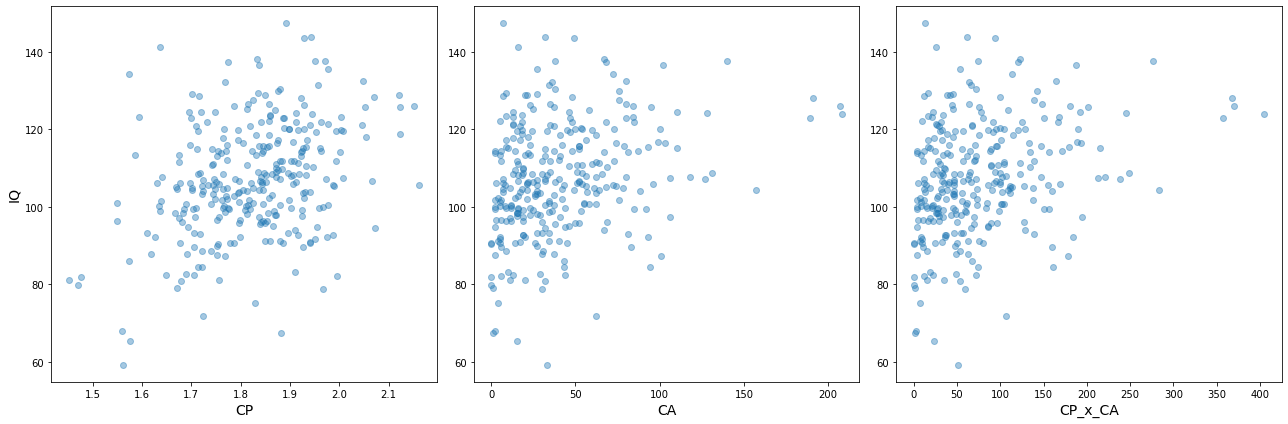

In [171]:
y_name = "IQ"
x_names = list(df.drop([y_name], axis = 1))

plt.subplots(1, 3, figsize = (18, 6))

for i, x_name in enumerate(x_names):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x = df[x_name], y = df[y_name], alpha = 0.4)
    plt.xlabel(x_name, fontsize=14)
    if i == 0:
        plt.ylabel(y_name, fontsize=14)
plt.tight_layout()

In [146]:
corr_Xy = df.corr()[[y_name]].sort_values(y_name).drop(y_name,axis = 0)
corr_Xy

,IQ
CA,0.281401
CP_x_CA,0.298401
CP,0.352167


## Multiple Linear Regression

### Adding 1st predictor: **CP**

intercept:     29.894
coefficients: [42.406]
R²:            0.124
p:                         



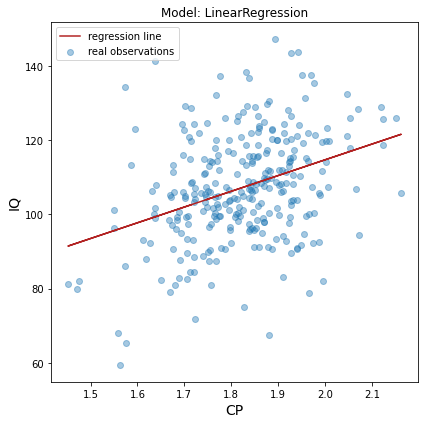

In [179]:
x_name = "CP"
X = df[[x_name]].values
y = df[["IQ"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")
print()

# for regression line plot
y_pred = linreg.predict(X)

# plot
plt.figure(figsize=(6, 6))
plt.plot(X, y_pred, c = "firebrick", label = "regression line")
plt.scatter(X, y, alpha = 0.4, label = "real observations")
plt.ylabel(y_name, fontsize=14)
plt.xlabel(x_name, fontsize=14)
plt.title("Model: " + str(linreg)[:-2])
plt.legend()
plt.tight_layout();

### Adding 2nd predictor: **CA**

In [180]:
X = df[["CP", "CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")

intercept:     36.156
coefficients: [36.951  0.09 ]
R²:            0.169
p:                         


### Adding 3rd predictor: **Interaction CP*CA**

In [177]:
X = df[["CP", "CA", "CP_x_CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")

intercept:     32.840
coefficients: [38.757  0.187 -0.052]
R²:            0.169
p:                         


### Sequence of predictor inclusion by correlation

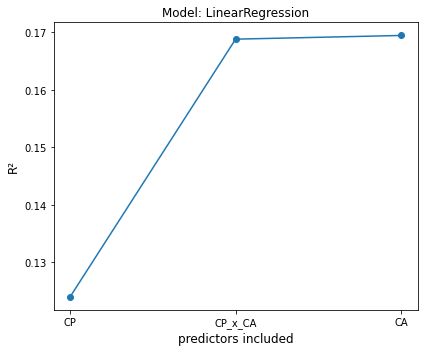

In [155]:
corr_Xy_abs = corr_Xy.abs().sort_values(y_name, ascending=False)
x_names_corr = list(corr_Xy_abs.T)

scores = []

for i, x_name in enumerate(x_names_corr):

    reg = LinearRegression()
    reg.fit(df[x_names_corr[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names_corr[:i + 1]], df[y_name]))

plt.figure(figsize=(6, 5))
plt.plot(x_names_corr, scores, marker = "o")
#plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictors included", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.title("Model: " + str(reg)[:-2])
#plt.grid()
plt.tight_layout();

<div class="alert alert-warning">Notes:
    <ul>
    <li> Inclusion of interaction does not seem to add anything to the model, but Interaction has higher correlation with outcome than CA. Would a model with predictors CP and interaction (and without CA) make sense? Or should the interaction always be included in the end after the main effects?</li>
    <li>p-values still missing.</li>
    <li>Confidence intervals still missing.</li>
    </ul></div>

## Machine learning methods

Interaction variable removed

In [286]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV


# cross validation constants
N_OUTER_SPLITS = 20
N_INNER_SPLITS = 50


# train test split function
def split_train_test(data, i_train, i_test):
    train = data.iloc[i_train, :]
    test = data.iloc[i_test, :]
    return train, test


# prepare data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df[df.columns.drop(["CP_x_CA", y_name])]), columns=df.columns.drop(["CP_x_CA", y_name]))
y = df[[y_name]]

### Regularized linear regression (Elastic net)

#### Hyperparameter tuning

In [ ]:
from sklearn.linear_model import ElasticNet
from scipy.stats import loguniform, uniform
import warnings

warnings.filterwarnings("ignore")

reg = ElasticNet()

hyper_space = {
    "alpha": loguniform(1e-4,1e3),
    "l1_ratio": uniform(1e-3,1.0)
    }

outer_cv = ShuffleSplit(n_splits=N_OUTER_SPLITS, test_size=0.2)    

best_model = None
best_score = None

# iterate over outer CV splitter
for i_cv, (i_train, i_test) in enumerate(outer_cv.split(X, y), start=1):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    # nested CV with parameter optimization
    inner_cv = ShuffleSplit(n_splits=N_INNER_SPLITS,
                                 test_size=0.2)   
    search_reg = RandomizedSearchCV(
        estimator=reg,
        param_distributions=hyper_space,
        n_iter=1000,
        cv=inner_cv,
        n_jobs=-2,
    )

    result = search_reg.fit(X_train, y_train.values.ravel())
    score = result.score(X_test, y_test)

    print(f"Split {str(i_cv).rjust(2)}:", f"R² = {score: ,.4f}, Model =", result.best_estimator_)
    
    if best_model == None:
        best_model = result.best_estimator_
        best_score = score
    else:
        if (score > best_score) | (best_model == None):
            best_model = result.best_estimator_
            best_score = score       

print(50*"-")
print("Best model: ", f"R² = {best_score: ,.4f}, Model =", best_model)

Split  1: R² =  0.1461, Model = ElasticNet(alpha=0.1945180667471167, l1_ratio=0.046153412925381)
Split  2: R² =  0.1015, Model = ElasticNet(alpha=0.16848961718114291, l1_ratio=0.022076861443934503)
Split  3: R² =  0.1128, Model = ElasticNet(alpha=0.06855063531551163, l1_ratio=0.010823108237586587)
Split  4: R² =  0.2411, Model = ElasticNet(alpha=0.043120650947962164, l1_ratio=0.0137815169179899)
Split  5: R² =  0.1633, Model = ElasticNet(alpha=0.1087667163197401, l1_ratio=0.008838317970080167)
Split  6: R² =  0.1993, Model = ElasticNet(alpha=0.09199678366256, l1_ratio=0.0777435581590813)
Split  7: R² =  0.0966, Model = ElasticNet(alpha=0.13081243915667284, l1_ratio=0.025715366075499846)
Split  8: R² =  0.2105, Model = ElasticNet(alpha=0.03510831365459279, l1_ratio=0.0013862870492948867)
Split  9: R² =  0.1294, Model = ElasticNet(alpha=0.059037894603927464, l1_ratio=0.0028292852760060097)
Split 10: R² =  0.0501, Model = ElasticNet(alpha=0.16076615939121938, l1_ratio=0.06210148440284191)

<div class="alert alert-warning">Note:
    <ul>
    <li>Here a model is trained on the training data, R² scores are showing how good the predictions are on the test data.</li>
    </ul></div>

In [280]:
res = best_model.fit(X_train, y_train)
score = res.score(X_test, y_test)

score

0.016168799343754592

### Random forests regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor( n_estimators=n_estimators,random_state = 0)
hyper_space = {
    'max_features': Real(1e-2,1e0,prior="uniform"),
    'min_samples_split': Integer(2,256,prior="log-uniform"),
    'min_samples_leaf': Integer(1,256,prior="log-uniform"),
}

#
#
#

## Bayesian regression

See examples from here https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html

In [4]:
#
#
#